In [1]:
# This notebook is for tests generation for state visualizer
# if you cannot run this notebook in conda env check this out: https://medium.com/@nrk25693/how-to-add-your-conda-environment-to-your-jupyter-notebook-in-just-4-steps-abeab8b8d084
from overcooked_ai_py.agents.benchmarking import AgentEvaluator
from overcooked_ai_py.agents.agent import SampleAgent, GreedyHumanModel, RandomAgent
from overcooked_ai_py.mdp.overcooked_mdp import OvercookedGridworld, OvercookedState, Recipe, SoupState
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer
from overcooked_ai_py.visualization.visualization_utils import show_image_in_ipython
from overcooked_ai_py.utils import generate_temporary_file_path
from overcooked_ai_py.static import FONTS_DIR
from overcooked_ai_py.mdp.layout_generator import POT
import copy
import pygame
import os
import numpy as np
import json


def has_cooking_timer(state, grid):
    for obj in state.objects.values():
        if isinstance(obj, SoupState):
            (x_pos, y_pos) = obj.position
            if obj._cooking_tick > 0 and grid[y_pos][x_pos] == POT:
                print("found cooking object", obj)
                return True
    return False


Recipe.configure({})
def display_and_export_to_array(test_dict):
    test_dict = copy.deepcopy(test_dict)
    test_dict["kwargs"]["state"] = OvercookedState.from_dict(test_dict["kwargs"]["state"])
    surface =  StateVisualizer(**test_dict["config"]).render_state(**test_dict["kwargs"])
    img_path = generate_temporary_file_path("temporary_visualization", extension=".png")
    pygame.image.save(surface, img_path)
    print("check if image is okay")
    show_image_in_ipython(img_path)
    return pygame.surfarray.array3d(surface)

def save_test_files(test_dicts_list, test_result_arrays, json_filename):
    for d, a in zip(test_dicts_list, test_result_arrays):
        with open(d["result_array_filename"], 'wb') as f:
            np.save(f, a)
    with open(json_filename, "w") as f:
        json.dump(test_dicts_list, f)
        
DEFAULT_VALUES = {
        "height": None, # if None use grid_width - NOTE: can chop down hud if hud is wider than grid
        "width": None, # if None use (hud_height+grid_height)
        "tile_size": 75,
        "window_fps": 30,
        "player_colors": ['blue', 'green'],
        "is_rendering_hud": True,
        "hud_font_size": 10,
        "hud_system_font_name": None, # if set to None use hud_font_path
        # needs to be overwritten with default - every pc has different pathes "hud_font_path": roboto_path, 
        "hud_font_color": (255,255,255), # white
        "hud_data_default_key_order": ["orders_list", "all_orders", "bonus_orders", "start_all_orders", "start_bonus_orders", "time_left", "score", "potential"],
        "hud_interline_size": 10,
        "hud_margin_bottom": 10,
        "hud_margin_top": 10,
        "hud_margin_left": 10,
        "hud_distance_between_orders": 5,
        "hud_order_size": 15,
        "is_rendering_cooking_timer": True,
        "show_timer_when_cooked": True,
        "cooking_timer_font_size": 20, # # if set to None use cooking_timer_font_path
        # needs to be overwritten with default - every pc has different pathes "cooking_timer_font_path": roboto_path, 
        "cooking_timer_system_font_name": None,
        "cooking_timer_font_color": (255, 0, 0), # red
        "grid": None,
        "background_color": (155, 101, 0), # color of empty counter
        "hud_order_timer_font_size": 8,
        "hud_recipe_timer_bonus_order_color": (0,255,0), # green
        "hud_recipe_timer_color": (255,255,0) # yellow
    }


pygame 1.9.5
Hello from the pygame community. https://www.pygame.org/contribute.html


Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1.00; : 100%|██████████| 1/1 [00:00<00:00, 18.36it/s]

motion planner with different counter goal or mdp found, computing from scratch
Computing MotionPlanner to be saved in /home/bm/Desktop/programming/dev/overcooked_ai2/overcooked_ai/src/overcooked_ai_py/data/planners/cramped_room_mp.pkl
It took 0.049886465072631836 seconds to create mp
Skipping trajectory consistency checking because MDP was recognized as variable. Trajectory consistency checking is not yet supported for variable MDPs.
testing test_hud_1 dict
check if image is okay


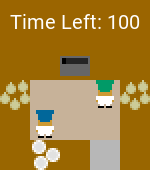

{'layout_name': 'cramped_room', 'terrain': [['X', 'X', 'P', 'X', 'X'], ['O', ' ', ' ', ' ', 'O'], ['X', ' ', ' ', ' ', 'X'], ['X', 'D', 'X', 'S', 'X']], 'start_player_positions': [(1, 2), (3, 1)], 'start_orders_list': {'orders': [{'recipe': {'ingredients': ('onion', 'onion', 'onion')}, 'time_to_expire': None, 'expire_penalty': 0, 'base_reward': None, 'linear_time_bonus_reward': 0, 'order_id': '7cf0cf78-2d17-11eb-a9f0-876c0f6ae3d5', 'is_bonus': False}], 'add_new_order_every': None, 'time_to_next_order': None, 'orders_to_add': []}, 'rew_shaping_params': {'PLACEMENT_IN_POT_REW': 3, 'DISH_PICKUP_REWARD': 3, 'SOUP_PICKUP_REWARD': 5, 'DISH_DISP_DISTANCE_REW': 0, 'POT_DISTANCE_REW': 0, 'SOUP_DISTANCE_REW': 0}}
testing test_hud_2 dict
check if image is okay


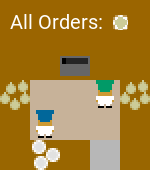

testing test_hud_3 dict
check if image is okay


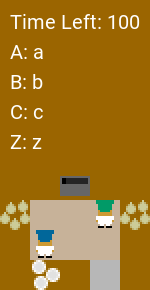

In [2]:
# because of inconsistent display of fonts there is no HUD tests currently used
hud_tests = []
hud_test_results = []

mdp = OvercookedGridworld.from_layout_name(layout_name="cramped_room")
agent_eval = AgentEvaluator(env_params={"horizon": 1}, mdp_fn=lambda _: mdp)

trajectory_random_pair = agent_eval.evaluate_random_pair(num_games=1, display=False, native_eval=True)
grid = trajectory_random_pair["mdp_params"][0]["terrain"]
state = trajectory_random_pair["ep_states"][0][0]

config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 30
config["hud_font_size"] = 20
hud_data = {"time_left": 100}
kwargs = {"hud_data": hud_data, "grid":grid, "state":state.to_dict()}
test_hud_1 = {"config": config, "kwargs": kwargs, 
             "comment": "Test simple text in hud. NOTE: failing to render stuff outside HUD also fails this test",
             "result_array_filename": "test_hud_1.npy"}
print("testing test_hud_1 dict")
test_hud_1_array = display_and_export_to_array(test_hud_1)
hud_tests.append(test_hud_1)
hud_test_results.append(test_hud_1_array)


config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 30
config["hud_font_size"] = 20
config["hud_order_size"] = 25
print(trajectory_random_pair["mdp_params"][0])
hud_data = {"all_orders": [o.to_dict() for o in state.all_orders]}
kwargs = {"hud_data": hud_data, "grid":grid, "state":state.to_dict()}
test_hud_2 = {"config": config, "kwargs": kwargs, 
             "comment": "Test simple recipes in hud. NOTE: failing to render stuff outside HUD also fails this test",
             "result_array_filename": "test_hud_2.npy"}

print("testing test_hud_2 dict")
test_hud_2_array = display_and_export_to_array(test_hud_2)
hud_tests.append(test_hud_2)
hud_test_results.append(test_hud_2_array)

config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 30
config["hud_font_size"] = 20
hud_data = {"time_left": 100, "a":"a", "b": "b", "c": "c",  "z":"z"}
kwargs = {"hud_data": hud_data, "grid":grid, "state":state.to_dict()}
test_hud_3 = {"config": config, "kwargs": kwargs, 
             "comment": "Test chronology of hud based on keys NOTE: failing to render stuff outside HUD also fails this test",
             "result_array_filename": "test_hud_3.npy"}
print("testing test_hud_3 dict")
test_hud_3_array = display_and_export_to_array(test_hud_3)
hud_tests.append(test_hud_3)
hud_test_results.append(test_hud_3_array)

In [3]:
# if all stuff above is ok run this cell
# because of inconsistent display of fonts there is no HUD tests currently used
save_test_files(hud_tests, hud_test_results, "render_state_data_test_hud.json")

testing test_size_1 dict
check if image is okay


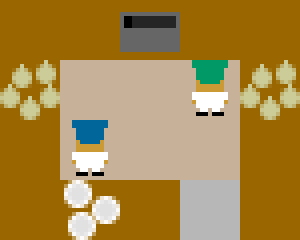

testing test_size_2 dict
check if image is okay


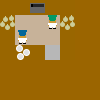

In [4]:
size_tests = []
size_test_results = []
config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 60
kwargs = {"hud_data": {}, "grid":grid, "state":state.to_dict()}
test_size_1 = {"config": config, "kwargs": kwargs, 
             "comment": "Test of setting of tile_size (no hud)",
             "result_array_filename": "test_size_1.npy"}
print("testing test_size_1 dict")
test_size_1_array = display_and_export_to_array(test_size_1)
size_tests.append(test_size_1)
size_test_results.append(test_size_1_array)

config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 15
config["height"] = 100
config["width"] = 100
kwargs = {"hud_data": {}, "grid":grid, "state":state.to_dict()}
test_size_2 = {"config": config, "kwargs": kwargs, 
             "comment": "Test of setting of width and height (no hud)",
             "result_array_filename": "test_size_2.npy"}
print("testing test_size_2 dict")
test_size_2_array = display_and_export_to_array(test_size_2)
size_tests.append(test_size_2)
size_test_results.append(test_size_2_array)

In [5]:
# if all stuff above is ok run this cell
save_test_files(size_tests, size_test_results, "render_state_data_test_sizes.json")

  0%|          | 0/1 [00:00<?, ?it/s]

motion planner with different counter goal or mdp found, computing from scratch
Computing MotionPlanner to be saved in /home/bm/Desktop/programming/dev/overcooked_ai2/overcooked_ai/src/overcooked_ai_py/data/planners/cramped_room_mp.pkl
It took 0.05459260940551758 seconds to create mp


Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1000.00; : 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Skipping trajectory consistency checking because MDP was recognized as variable. Trajectory consistency checking is not yet supported for variable MDPs.
found cooking object {ø1
test_cooking_timer_1 dict
check if image is okay


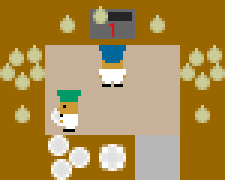

In [6]:
rendered_cooking_timer = False
config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 45

while not rendered_cooking_timer:
    mdp = OvercookedGridworld.from_layout_name(layout_name="cramped_room")
    agent_eval = AgentEvaluator(env_params={"horizon": 1000}, mdp_fn=lambda _: mdp)
    trajectory_random_pair = agent_eval.evaluate_random_pair(num_games=1, display=False, native_eval=True)
    grid = trajectory_random_pair["mdp_params"][0]["terrain"]
    for state in trajectory_random_pair["ep_states"][0]:
        if not rendered_cooking_timer and has_cooking_timer(state, grid):
            kwargs = {"hud_data": {}, "grid":grid, "state":state.to_dict()}
            test_cooking_timer_1 = {"config": config, "kwargs": kwargs, 
             "comment": "Test of setting rendering cooking timer",
             "result_array_filename": "test_cooking_timer_display_1.npy"}
            print("test_cooking_timer_1 dict")
            test_test_cooking_timer_1_array = display_and_export_to_array(test_cooking_timer_1)
            rendered_cooking_timer = True

In [7]:
# if all stuff above is ok run this cell
save_test_files([test_cooking_timer_1], [test_test_cooking_timer_1_array], "render_state_data_test_cooking_display.json")

  0%|          | 0/1 [00:00<?, ?it/s]

motion planner with different counter goal or mdp found, computing from scratch
Computing MotionPlanner to be saved in /home/bm/Desktop/programming/dev/overcooked_ai2/overcooked_ai/src/overcooked_ai_py/data/planners/cramped_room_tomato_mp.pkl
It took 0.05163455009460449 seconds to create mp


Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1001.00; : 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

Skipping trajectory consistency checking because MDP was recognized as variable. Trajectory consistency checking is not yet supported for variable MDPs.
test_various_display_1 dict
check if image is okay


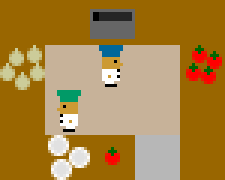

test_various_display_2 dict
check if image is okay


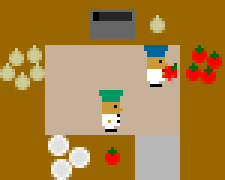

test_various_display_3 dict
check if image is okay


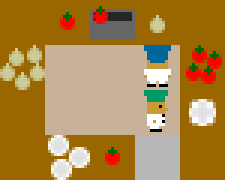

test_various_display_4 dict
check if image is okay


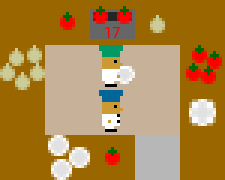

test_various_display_5 dict
check if image is okay


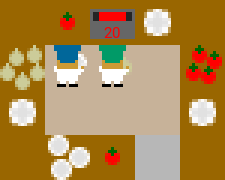

test_various_display_6 dict
check if image is okay


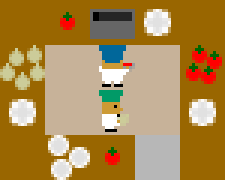

test_various_display_7 dict
check if image is okay


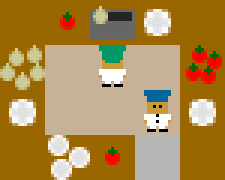

test_various_display_8 dict
check if image is okay


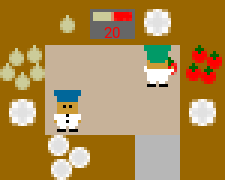

test_various_display_9 dict
check if image is okay


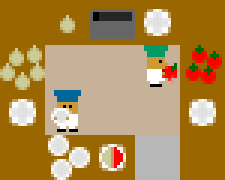

test_various_display_10 dict
check if image is okay


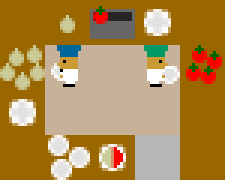

In [8]:
# testing some states hoping it can find unexpected bugs
various_tests = []
various_results = []

config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 45
config["cooking_timer_font_size"] = 15
mdp = OvercookedGridworld.from_layout_name(layout_name="cramped_room_tomato")
agent_eval = AgentEvaluator(env_params={"horizon": 1001}, mdp_fn=lambda _: mdp)
trajectory_random_pair = agent_eval.evaluate_random_pair(num_games=1, display=False, native_eval=True)
grid = trajectory_random_pair["mdp_params"][0]["terrain"]
for i in range(1, 11):
    state = trajectory_random_pair["ep_states"][0][i*100]
    kwargs = {"hud_data": {}, "grid":grid, "state":state.to_dict()}
    test_dict = {"config": config, "kwargs": kwargs, 
     "comment": "Various tests",
     "result_array_filename": "test_various_display_%d.npy"%i}
    print("test_various_display_%i dict"%i)
    test_array = display_and_export_to_array(test_dict)
    various_tests.append(test_dict)
    various_results.append(test_array)
    

In [9]:
# if all stuff above is ok run this cell
save_test_files(various_tests, various_results, "render_state_data_test_various.json")

  0%|          | 0/1 [00:00<?, ?it/s]

Recomputing motion planner due to: [Errno 2] No such file or directory: '/home/bm/Desktop/programming/dev/overcooked_ai2/overcooked_ai/src/overcooked_ai_py/data/planners/XOODXXX|S    1X|X   X2S|XPD X X|XXXXXXX_mp.pkl'
Computing MotionPlanner to be saved in /home/bm/Desktop/programming/dev/overcooked_ai2/overcooked_ai/src/overcooked_ai_py/data/planners/XOODXXX|S    1X|X   X2S|XPD X X|XXXXXXX_mp.pkl
It took 0.2566192150115967 seconds to create mp


Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1001.00; : 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

Skipping trajectory consistency checking because MDP was recognized as variable. Trajectory consistency checking is not yet supported for variable MDPs.
test_generated_layout_display_1 dict
check if image is okay


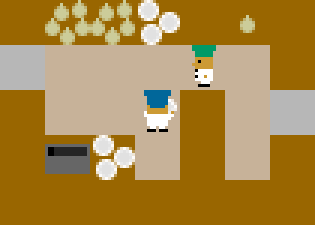

test_generated_layout_display_2 dict
check if image is okay


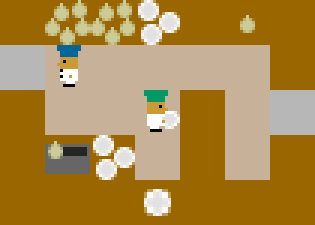

test_generated_layout_display_3 dict
check if image is okay


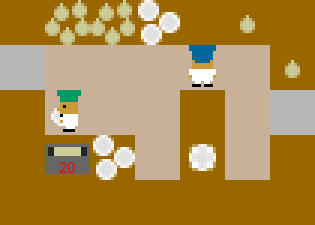

test_generated_layout_display_4 dict
check if image is okay


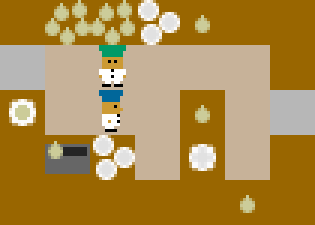

test_generated_layout_display_5 dict
check if image is okay


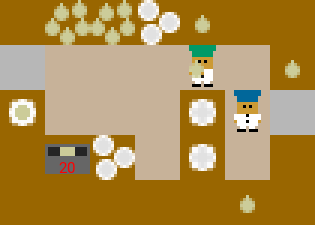

test_generated_layout_display_6 dict
check if image is okay


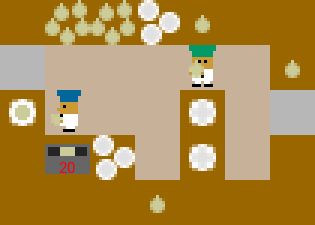

test_generated_layout_display_7 dict
check if image is okay


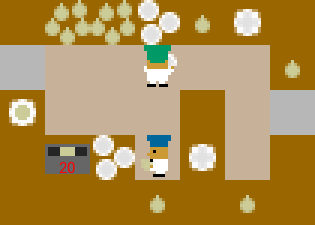

test_generated_layout_display_8 dict
check if image is okay


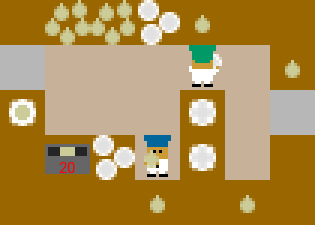

test_generated_layout_display_9 dict
check if image is okay


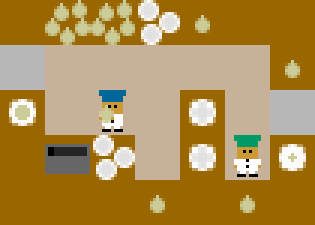

test_generated_layout_display_10 dict
check if image is okay


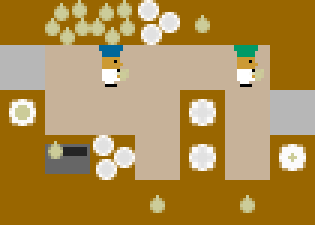

In [10]:
from overcooked_ai_py.mdp.layout_generator import LayoutGenerator
# testing some states hoping it can find unexpected bugs
generated_layout_tests = []
generated_layout_results = []

config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 45
config["cooking_timer_font_size"] = 15

DEFAULT_MDP_GEN_PARAMS = {
    "inner_shape": (7, 5),
    "prop_empty": 0.7,
    "prop_feats": 0.4,
    "start_all_orders" : [
        { "ingredients" : ["onion", "onion", "onion"]}
    ],
    "recipe_values" : [20],
    "recipe_times" : [20],
    "display": False
}

mdp_fn = LayoutGenerator.mdp_gen_fn_from_dict(DEFAULT_MDP_GEN_PARAMS, outer_shape=(7, 5))

agent_eval = AgentEvaluator({"horizon": 1001}, mdp_fn)
trajectory_random_pair = agent_eval.evaluate_random_pair(num_games=1, display=False, native_eval=True)
grid = trajectory_random_pair["mdp_params"][0]["terrain"]
for i in range(1, 11):
    state = trajectory_random_pair["ep_states"][0][i*100]
    kwargs = {"hud_data": {}, "grid":grid, "state":state.to_dict()}
    test_dict = {"config": config, "kwargs": kwargs, 
     "comment": "Various tests on generated layout",
     "result_array_filename": "test_generated_layout_display_%d.npy"%i}
    print("test_generated_layout_display_%i dict"%i)
    test_array = display_and_export_to_array(test_dict)
    generated_layout_tests.append(test_dict)
    generated_layout_results.append(test_array)

In [11]:
# if all stuff above is ok run this cell
save_test_files(generated_layout_tests, generated_layout_results, "render_state_data_test_generated_layout.json")

  0%|          | 0/1 [00:00<?, ?it/s]

motion planner with different counter goal or mdp found, computing from scratch
Computing MotionPlanner to be saved in /home/bm/Desktop/programming/dev/overcooked_ai2/overcooked_ai/src/overcooked_ai_py/data/planners/cramped_room_mp.pkl
It took 0.0586855411529541 seconds to create mp


Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1001.00; : 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


Skipping trajectory consistency checking because MDP was recognized as variable. Trajectory consistency checking is not yet supported for variable MDPs.
Computing MediumLevelActionManager
medium level action manager with different params or mdp found, computing from scratch
Computing MediumLevelActionManager to be saved in /home/bm/Desktop/programming/dev/overcooked_ai2/overcooked_ai/src/overcooked_ai_py/data/planners/cramped_room_am.pkl
It took 0.3769831657409668 seconds to create mlam
test_action_probs_display_1 dict
check if image is okay


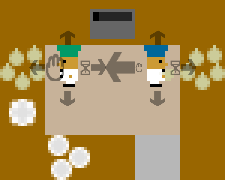

test_action_probs_display_2 dict
check if image is okay


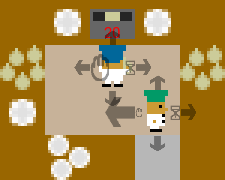

test_action_probs_display_3 dict
check if image is okay


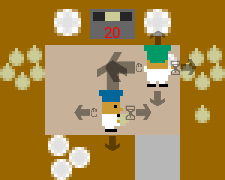

test_action_probs_display_4 dict
check if image is okay


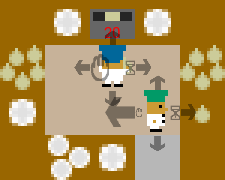

test_action_probs_display_5 dict
check if image is okay


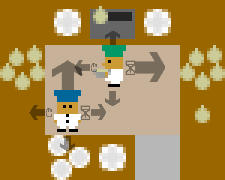

test_action_probs_display_6 dict
check if image is okay


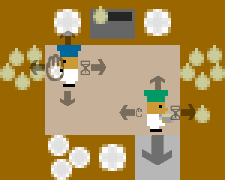

test_action_probs_display_7 dict
check if image is okay


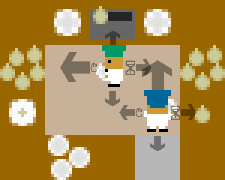

test_action_probs_display_8 dict
check if image is okay


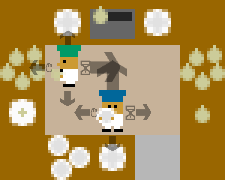

test_action_probs_display_9 dict
check if image is okay


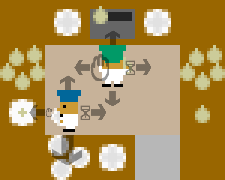

test_action_probs_display_10 dict
check if image is okay


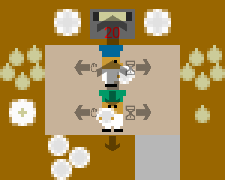

In [12]:
action_probs_tests = []
action_probs_results = []
config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 45
config["cooking_timer_font_size"] = 15
mdp = OvercookedGridworld.from_layout_name(layout_name="cramped_room")
agent_eval = AgentEvaluator.from_mdp(mdp, env_params={"horizon": 1001})
trajectory_random_pair = agent_eval.evaluate_random_pair(num_games=1, display=False, native_eval=True)
grid = trajectory_random_pair["mdp_params"][0]["terrain"]

agent1 = SampleAgent([GreedyHumanModel(mlam=agent_eval.env.mlam),
                      RandomAgent(all_actions=True),
                      RandomAgent(all_actions=False)])
agent1.set_agent_index(0)
agent1.set_mdp(mdp)

agent2 = SampleAgent([GreedyHumanModel(mlam=agent_eval.env.mlam),
                      RandomAgent(all_actions=True),
                      RandomAgent(all_actions=False)])
agent2.set_agent_index(1)
agent2.set_mdp(mdp)


for i in range(1, 11):
    state = trajectory_random_pair["ep_states"][0][i*100]
    action_probs = [list(agent1.action(state)[1]["action_probs"]), list(agent2.action(state)[1]["action_probs"])]
    kwargs = {"hud_data": {}, "grid":grid, "state":state.to_dict(), "action_probs":action_probs}
    test_dict = {"config": config, "kwargs": kwargs, 
     "comment": "Action probs tests",
     "result_array_filename": "test_action_probs_display_%d.npy"%i}
    print("test_action_probs_display_%i dict"%i)
    test_array = display_and_export_to_array(test_dict)
    action_probs_tests.append(test_dict)
    action_probs_results.append(test_array)

In [13]:
# if all stuff above is ok run this cell
save_test_files(action_probs_tests, action_probs_results, "render_state_data_test_action_probs_display.json")

  0%|          | 0/1 [00:00<?, ?it/s]

motion planner with different counter goal or mdp found, computing from scratch
Computing MotionPlanner to be saved in /home/bm/Desktop/programming/dev/overcooked_ai2/overcooked_ai/src/overcooked_ai_py/data/planners/cramped_room_single_changing_bonus_order_mp.pkl
It took 0.04963231086730957 seconds to create mp


Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 501.00; : 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

Skipping trajectory consistency checking because MDP was recognized as variable. Trajectory consistency checking is not yet supported for variable MDPs.
test_temporary_orders_display_1 dict
check if image is okay


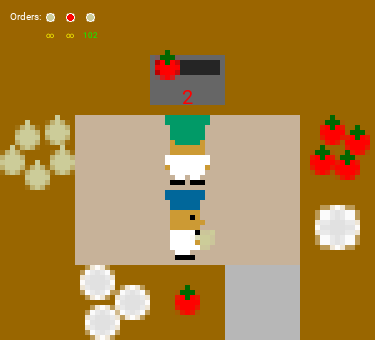

test_temporary_orders_display_2 dict
check if image is okay


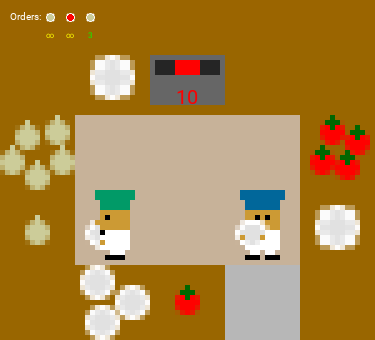

test_temporary_orders_display_3 dict
check if image is okay


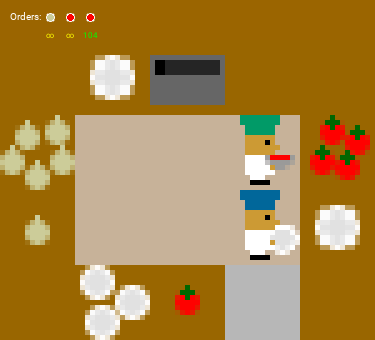

test_temporary_orders_display_4 dict
check if image is okay


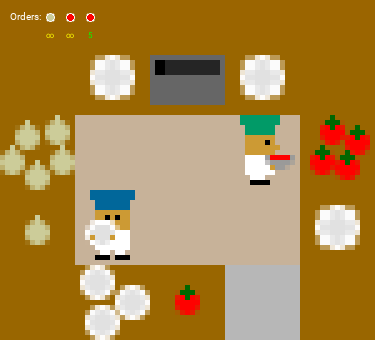

test_temporary_orders_display_5 dict
check if image is okay


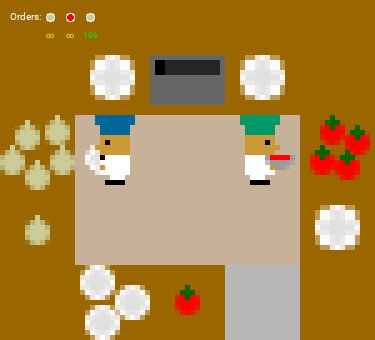

In [14]:
temporary_orders_tests = []
temporary_orders_results = []
config = copy.deepcopy(DEFAULT_VALUES)
mdp = OvercookedGridworld.from_layout_name(layout_name="cramped_room_single_changing_bonus_order")
agent_eval = AgentEvaluator(env_params={"horizon": 501}, mdp_fn=lambda _: mdp)
trajectory_random_pair = agent_eval.evaluate_random_pair(num_games=1, display=False, native_eval=True)
grid = trajectory_random_pair["mdp_params"][0]["terrain"]
for i in range(1, 6):
    state = trajectory_random_pair["ep_states"][0][i*99]
    kwargs = {"hud_data": {"orders_list": state.orders_list.to_dict()}, "grid":grid, "state":state.to_dict()}
    test_dict = {"config": config, "kwargs": kwargs, 
     "comment": "Temporary orders tests",
     "result_array_filename": "test_temporary_orders_display_%d.npy"%i}
    print("test_temporary_orders_display_%i dict"%i)
    test_array = display_and_export_to_array(test_dict)
    temporary_orders_tests.append(test_dict)
    temporary_orders_results.append(test_array)
    


In [15]:
# if all stuff above is ok run this cell
save_test_files(temporary_orders_tests, temporary_orders_results, "render_state_data_test_temporary_orders_display.json")